# More summertime low-power production extremes in Germany with a larger solar power share
Ho-Tran and Fiedler (2024b)
Create all figures in the manuscript (2024-10-31) </br>
Part 1: Statistics
- In 50 lowest (highest) total production, how much in each month
- 1-, 7-, 14-day event, scale-2019 and scenario-2050 installations

Part 2: Maps and meteograms

In [1]:
# CDO
from cdo import Cdo   # python version
cdo = Cdo()

import os, glob
import xarray as xr
import pandas as pd
import datetime as dt
import numpy as np

import cartopy
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

import seaborn as sns
import string

import matplotlib.pyplot as plt
from pylab import savefig
plt.switch_backend('agg')  # save image in plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]  # increase size of inline figure

from utils_LH import GWL_table, rotated_projection_cosmo, cosmo_map_extent, newcmap_OrGy  #, anomalies_perGWL 
from utils_LH import Dir, new_lat, new_lon, lat, lon, df_GWL, list_lgcGWL, df_GWL_season


/home/linhho/miniconda3/envs/py3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Get time series of anomalies after eliminating diurnal and seasonal cycle
From Paper2_met_maskGermany.ipynb

In [2]:
#>>>>>>>>>>>>> RUN this!!
fname = '/net/respos/linhho/energy_model/mask/Timeseries_anomaly_NEWnormalised_5cnt_hourly_2scenarios_1995_2017_DEATCHDKFR.csv'
anomaly_all_cnt = pd.read_csv(fname, sep='\t')
anomaly_all_cnt['time'] = pd.to_datetime(anomaly_all_cnt['time'], format = '%Y-%m-%d %H:%M')
anomaly_all_cnt = anomaly_all_cnt.set_index(['Country', 'Scenario', 'time'])
anomaly_all_cnt

PV        Wp     total
Country Scenario  time                                        
DE      scale2019 1995-01-01 00:00:00  0.0  0.203134  0.187068
                  1995-01-01 01:00:00  0.0  0.223144  0.205495
                  1995-01-01 02:00:00  0.0  0.266578  0.245494
                  1995-01-01 03:00:00  0.0  0.314852  0.289950
                  1995-01-01 04:00:00  0.0  0.378194  0.348282
...                                    ...       ...       ...
FR      scen2050  2017-12-31 19:00:00  0.0  0.620690  0.260229
                  2017-12-31 20:00:00  0.0  0.613933  0.257396
                  2017-12-31 21:00:00  0.0  0.605267  0.253763
                  2017-12-31 22:00:00  0.0  0.603633  0.253078
                  2017-12-31 23:00:00  0.0  0.603103  0.252855

[2016240 rows x 3 columns]

In [5]:
from utils_LH import count_lowest_event_per_month, get_decycled_ts
from utils_LH import list_lgcGWL, list_lgcGWL_cyclonic, list_lgcGWL_anticyclonic
# from calendar import monthrange

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

anomaly_DE_2019 = anomaly_all_cnt.xs('DE', level="Country", drop_level=True).xs('scale2019', level="Scenario", drop_level=True)
anomaly_DE_2050 = anomaly_all_cnt.xs('DE', level="Country", drop_level=True).xs('scen2050', level="Scenario", drop_level=True)

series_GWL_frequency_1995_2017_winter = df_GWL_season[df_GWL_season['Year']<=2017][df_GWL_season['Season']=='winter']['lgcGWL'].value_counts() / 4192*100
series_GWL_frequency_1995_2017_summer = df_GWL_season[df_GWL_season['Year']<=2017][df_GWL_season['Season']=='summer']['lgcGWL'].value_counts() / 4209*100

list_lgcGWL_cyclonic = ['Nz', 'NWz', 'NEz', 'Sz', 'SEz', 'SWz', 'Wz', 'Ww', 'Ws',
              'TrM', 'TrW', 'TB', 'HNz', 'HNFz', 'HFz', 'TM'] 
list_lgcGWL_anticyclonic = ['HFa', 'HNFa', 'HNa', 'Na', 'NWa', 'NEa', 'Wa', 'Sa',
              'SWa', 'SEa', 'HM', 'HB', 'BM']

# categories_duration_order = ['1-day', '7-day', '14-day']
categories_duration = pd.CategoricalIndex(['1-day', '7-day', '14-day'], categories=['1-day', '7-day', '14-day'], ordered=True)

def get_ordered_duration_category(df_input):
    df_input.index.set_levels(categories_duration, level='Name', inplace=True)
#     df_input.sort_index(inplace=True)
    return  df_input


### GWL associated with lowest total production events

In [72]:
df_stat_GWL_by_all.loc[list_lgcGWL_cyclonic]['Count'].groupby(level=['Season', 'Scenario', 'Name']).sum()

Season  Scenario       Name  
summer  scale-2019     1-day       0
                       14-day      8
                       7-day       1
        scenario-2050  1-day       5
                       14-day    122
                       7-day      39
winter  scale-2019     1-day      20
                       14-day    261
                       7-day     118
        scenario-2050  1-day      24
                       14-day    203
                       7-day     128
Name: Count, dtype: int64

winter
Number of days with
scale-2019
Missing months of stats 2019 []
1-day events is 31, Missing months of stats 2019 []
7-day events is 275, Missing months of stats 2019 []
14-day events is 596, scenario-2050
Missing months of stats 2019 []
1-day events is 30, Missing months of stats 2019 []
7-day events is 282, Missing months of stats 2019 []
14-day events is 613, 
summer
Number of days with
scale-2019
Missing months of stats 2019 []
1-day events is 19, Missing months of stats 2019 []
7-day events is 75, Missing months of stats 2019 []
14-day events is 104, scenario-2050
Missing months of stats 2019 []
1-day events is 20, Missing months of stats 2019 []
7-day events is 68, Missing months of stats 2019 []
14-day events is 87, 
winter
Number of days with
scale-2019
Missing months of stats 2019 [5, 6, 7, 8, 9]
1-day events is 50, Missing months of stats 2019 [5, 6, 7, 8, 9]
7-day events is 329, Missing months of stats 2019 [5, 6, 7, 8, 9]
14-day events is 663, scenario-2050
Missing mon

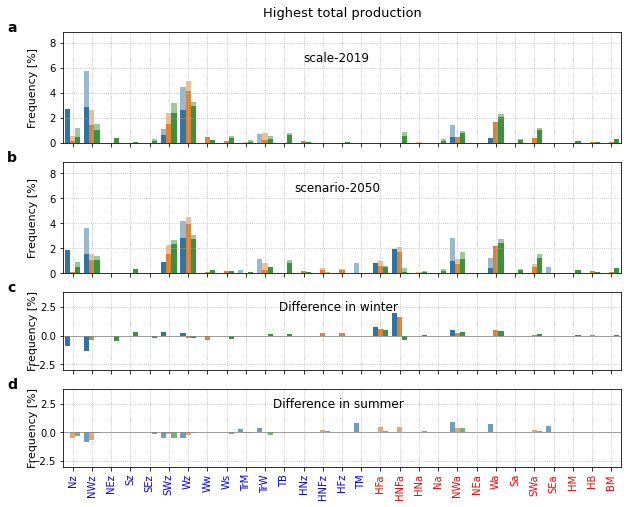

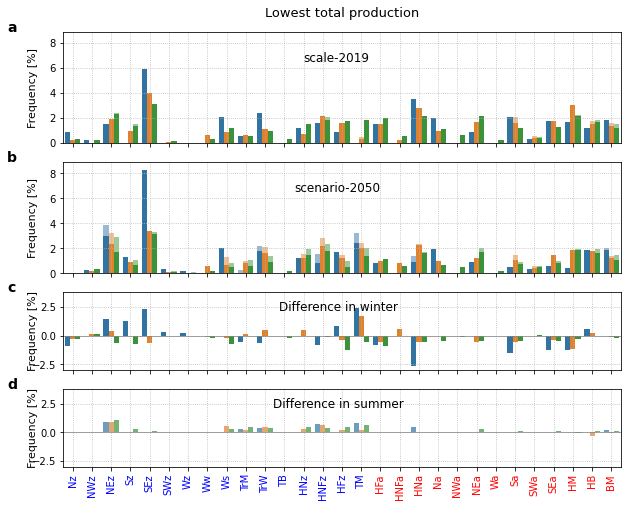

In [327]:
## OFFICIAL - annual - by GWL - Fig 2 cyclonic-anticyclonic and supplementary for 29 GWLs

number_of_events_sel = 50
df_stat_by_cyclonic = pd.DataFrame()

for idx, label in enumerate(['Highest', 'Lowest']):
    if idx: order_ascending_sel = True
    else: order_ascending_sel = False

    ## Amongst 700 days of 50 lowest 14-day events, 663 days are in the winter
    df_stat_GWL_by_all = pd.DataFrame()

    for season in ["winter", "summer"]:
        print(season)
        print("Number of days with")
        df_stat_GWL_byscen_byseason = pd.DataFrame()

        for idx, anomaly_DE_by_scen in enumerate([anomaly_DE_2019, anomaly_DE_2050]):
            if idx==0: name_scen='scale-2019'
            elif idx==1: name_scen='scenario-2050'
            print(str(name_scen))

            for length in [1, 7, 14]:

                index_of_extreme_events = count_lowest_event_per_month(anomaly_DE_by_scen, order_ascending=order_ascending_sel, 
                                                    number_of_events_DESIRED=number_of_events_sel, var_name='total')[2][length]
                tmp2 = [pd.date_range(i - pd.Timedelta(days=(length-1)/2), i + pd.Timedelta(days=(length-1)/2), freq='D') for i in index_of_extreme_events]
                index_of_extreme_events_with_duration = [item for sublist in tmp2 for item in sublist]  # flatten the lists in list

                tmp = anomaly_DE_by_scen.loc[index_of_extreme_events_with_duration][anomaly_DE_by_scen['Season']==season]['GWL'].value_counts().rename('Count').to_frame()#.reset_index()    
                tmp['Name'] = '{}-day'.format(length)
                ## Frequency for each duration separately, as 14-day events would have more days
                tmp['Freq_in_50_events'] = tmp['Count'] / (length * 50) * 100

                if season=='winter':
                    tmp['Freq_normalised'] = tmp['Freq_in_50_events'] / series_GWL_frequency_1995_2017_winter
                elif season=='summer':
                    tmp['Freq_normalised'] = tmp['Freq_in_50_events'] / series_GWL_frequency_1995_2017_summer
                tmp = tmp.rename_axis('GWL').reset_index(drop=False)
                tmp['GWL'] = pd.Categorical(tmp['GWL'], categories=list_lgcGWL)
                if length==1: df_stat_GWL_byscen = pd.DataFrame(columns=tmp.columns)
                df_stat_GWL_byscen = pd.concat([df_stat_GWL_byscen, tmp])
                print("{}-day events is {}".format(length, tmp['Count'].sum()), end=", ")

            df_stat_GWL_byscen['Scenario'] = name_scen
#             df_stat_GWL_byscen['Name'] = pd.Categorical(df_stat_GWL_byscen['Name'], categories=['1-day', '7-day', '14-day'], ordered=True)  # order 7-day before 14-day
            df_stat_GWL_byscen_byseason = pd.concat([df_stat_GWL_byscen_byseason, df_stat_GWL_byscen])

        df_stat_GWL_byscen_byseason['Season'] = season
        df_stat_GWL_by_all = pd.concat([df_stat_GWL_by_all, df_stat_GWL_byscen_byseason])
        print()    

    df_stat_GWL_by_all = df_stat_GWL_by_all.set_index(['GWL', 'Season', 'Scenario', 'Name']).reindex(level='Name', index=['1-day', '7-day', '14-day'])

    ## get statistic by cyclonic or anticyclonic type
    tmp = df_stat_GWL_by_all.loc[list_lgcGWL_cyclonic][['Count', 'Freq_in_50_events']].groupby(level=['Season', 'Scenario', 'Name']).sum().reset_index(drop=False)
    tmp['Type'] = 'cyclonic'
    tmp['Label'] = label
    df_stat_by_cyclonic = pd.concat([df_stat_by_cyclonic, tmp])

    tmp = df_stat_GWL_by_all.loc[list_lgcGWL_anticyclonic][['Count', 'Freq_in_50_events']].groupby(level=['Season', 'Scenario', 'Name']).sum().reset_index(drop=False)
    tmp['Type'] = 'anticyclonic'
    tmp['Label'] = label
    df_stat_by_cyclonic = pd.concat([df_stat_by_cyclonic, tmp])

    ## plot 29 GWLs for supplementary
#     plot_29GWL_extreme_events(df_stat_GWL_by_all, fname='paper2/Fig_supplement_29GWLs_{}.jpg'.format(label))
    


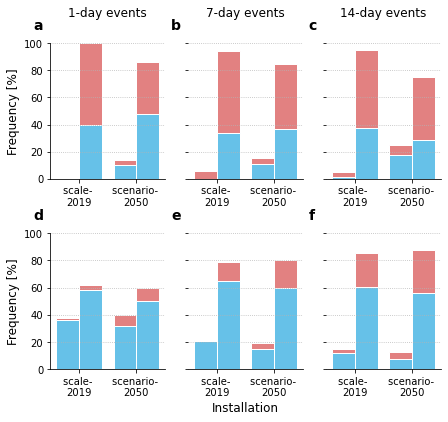

In [346]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7,6), sharey=True)
fig.subplots_adjust(hspace = 0.4, wspace=.2)

for i, label in enumerate(['Lowest', 'Highest']):
    tmp = df_stat_by_cyclonic[df_stat_by_cyclonic['Label']==label]
    for j, number_day in enumerate(['1-day', '7-day', '14-day']):
        axes[0,j].set_title('{} events'.format(number_day), y=1.15)
        
        tmp2 = tmp[tmp['Name']==number_day]
        sns.barplot(data=tmp2.groupby(['Season', 'Scenario', 'Name']).sum().reset_index(drop=False), 
            x='Scenario', y='Freq_in_50_events', hue='Season', ax=axes[i,j], alpha=1, palette=['#F27171', '#F27171'], edgecolor='white')
        sns.barplot(data=tmp2[tmp2['Type']=='cyclonic'], 
            x='Scenario', y='Freq_in_50_events', hue='Season', ax=axes[i,j], alpha=1, palette=['#50CAFE', '#50CAFE'], edgecolor='white')
        axes[i,j].get_legend().remove()

        axes[i,j].grid(axis='y', which='major', color='#B4B4B4', linestyle=':')
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        if j != 0: 
            axes[i,j].spines['left'].set_visible(False)
            axes[i,j].set_ylabel(None)
        axes[i,j].set_ylim([0,100])
        axes[i,j].set_xlabel(None)
        axes[i,j].set_xticklabels(['scale- \n2019', 'scenario- \n2050'])
        
    axes[i,0].set_ylabel('Frequency [%]', fontsize=12)
axes[1,1].set_xlabel('Installation', fontsize=12)
        
## numbering subplots
axs = axes.flat
for n, ax in enumerate(axs):
    ax.text(-.15, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=14, weight='bold')
# fig.text(0.03, .7, 'Lowest production events', ha='center', va='center', rotation='vertical', fontsize=13)
# fig.text(0.03, .3, 'Highest production events', ha='center', va='center', rotation='vertical', fontsize=13)
fig.savefig('paper2/Fig3_stat_season_cyclonic.pdf', dpi=300, transparent=True, bbox_inches = "tight")


In [ ]:
#>>>>>>>>>>>>> RUN this!!
fname = '/net/respos/linhho/energy_model/mask/Timeseries_anomaly_NEWnormalised_5cnt_hourly_2scenarios_1995_2017_DEATCHDKFR.csv'
anomaly_all_cnt = pd.read_csv(fname, sep='\t')
anomaly_all_cnt['time'] = pd.to_datetime(anomaly_all_cnt['time'], format = '%Y-%m-%d %H:%M')
anomaly_all_cnt = anomaly_all_cnt.set_index(['Country', 'Scenario', 'time'])
anomaly_all_cnt

PV        Wp     total
Country Scenario  time                                        
DE      scale2019 1995-01-01 00:00:00  0.0  0.203134  0.187068
                  1995-01-01 01:00:00  0.0  0.223144  0.205495
                  1995-01-01 02:00:00  0.0  0.266578  0.245494
                  1995-01-01 03:00:00  0.0  0.314852  0.289950
                  1995-01-01 04:00:00  0.0  0.378194  0.348282
...                                    ...       ...       ...
FR      scen2050  2017-12-31 19:00:00  0.0  0.620690  0.260229
                  2017-12-31 20:00:00  0.0  0.613933  0.257396
                  2017-12-31 21:00:00  0.0  0.605267  0.253763
                  2017-12-31 22:00:00  0.0  0.603633  0.253078
                  2017-12-31 23:00:00  0.0  0.603103  0.252855

[2016240 rows x 3 columns]

## Statistic by month (Fig 1)

In [ ]:
from utils_LH import count_lowest_event_per_month, list_20distinct_colour
import seaborn as sns
import string
cmap = plt.cm.get_cmap('tab10', 10)

Missing months of stats 2019 [5, 6, 7, 8, 9]
Missing months of stats 2019 []
Missing months of stats 2019 []
Missing months of stats 2019 []


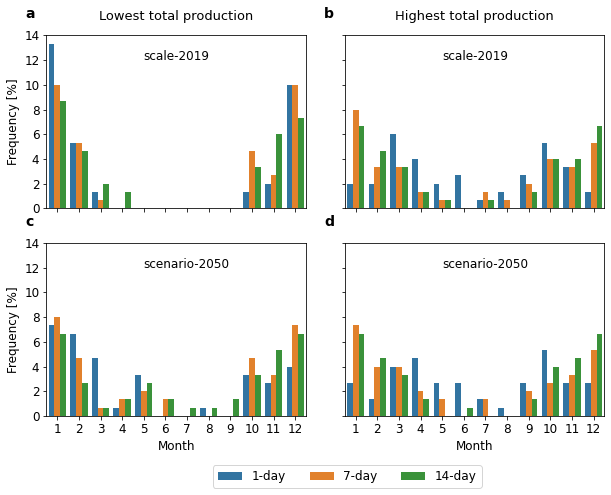

In [ ]:
## OFFICIAL - annual

## Barplot percentage of highest residual load in 20 events of 2019 and 2050

number_of_events_sel = 50

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7), sharex=True, sharey=True)
fig.subplots_adjust(hspace = 0.2, wspace=.15)

anomaly_DE_2019 = anomaly_all_cnt.xs('DE', level='Country', drop_level=True).xs('scale2019', level='Scenario', drop_level=True)
anomaly_DE_2050 = anomaly_all_cnt.xs('DE', level='Country', drop_level=True).xs('scen2050', level='Scenario', drop_level=True)

## LOWEST events
df_toplot2019 = count_lowest_event_per_month(anomaly_DE_2019, order_ascending=True, number_of_events_DESIRED=number_of_events_sel, var_name='total')[0]
df_toplot2050 = count_lowest_event_per_month(anomaly_DE_2050, order_ascending=True, number_of_events_DESIRED=number_of_events_sel, var_name='total')[0]

sns.barplot(data=df_toplot2019, x='Month', y='Frequency', hue='Name', ax=axes[0,0])
sns.barplot(data=df_toplot2050, x='Month', y='Frequency', hue='Name', ax=axes[1,0])

## HIGHEST events
df_toplot2019 = count_lowest_event_per_month(anomaly_DE_2019, order_ascending=False, number_of_events_DESIRED=number_of_events_sel, var_name='total')[0]
df_toplot2050 = count_lowest_event_per_month(anomaly_DE_2050, order_ascending=False, number_of_events_DESIRED=number_of_events_sel, var_name='total')[0]

sns.barplot(data=df_toplot2019, x='Month', y='Frequency', hue='Name', ax=axes[0,1])
sns.barplot(data=df_toplot2050, x='Month', y='Frequency', hue='Name', ax=axes[1,1])

## Title
axes[0,0].set_title(r"Lowest total production", fontsize=13, pad=15)
axes[0,0].text(4, 12, r"scale-2019", fontsize=12)
axes[1,0].text(4, 12, r"scenario-2050", fontsize=12)

axes[0,1].set_title(r"Highest total production", fontsize=13, pad=15)
axes[0,1].text(4, 12, r"scale-2019", fontsize=12)
axes[1,1].text(4, 12, r"scenario-2050", fontsize=12)

# fig.suptitle('Based on {}'.format(var_of_extreme), fontsize=14, y=1)

axes[0,0].set_xlabel(None)
axes[0,1].set_xlabel(None)
axes[1,0].set_xlabel('Month', fontsize=12)
axes[1,1].set_xlabel('Month', fontsize=12)

axes[0,0].set_ylabel('Frequency [%]', fontsize=12)
axes[1,0].set_ylabel('Frequency [%]', fontsize=12)
axes[0,1].set_ylabel(None)
axes[1,1].set_ylabel(None)

axes[0,0].legend('', frameon=False)
axes[0,1].legend('', frameon=False)
axes[1,1].legend('', frameon=False)
axes[1,0].legend(ncol=4, bbox_to_anchor=(1.7, -.25), fontsize=12)

axes[1,1].set_xlabel('Month', fontsize=12)

## numbering subplots
axs = axes.flat
for n, ax in enumerate(axs):
    ax.text(-.08, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=14, weight='bold')
    ax.tick_params(labelsize=12)
#     ax.set_xlim([0,1])

# fig.savefig('paper2/Paper2_Germany_frequency_bymonth_v2_{}events_lowestANDhighesttotal_NOdiurnalseasonal_1_7_14days_NOoverlap.jpg'.format(number_of_events_sel), dpi=180, transparent=True, bbox_inches = "tight")

### Frequency GWL for May

In [ ]:
## All for stats
number_of_events_sel = 50
byyear_2019_low  = count_lowest_event_per_month(anomaly_DE_2019, order_ascending=True, number_of_events_DESIRED=number_of_events_sel, var_name='total')
byyear_2050_low  = count_lowest_event_per_month(anomaly_DE_2050, order_ascending=True, number_of_events_DESIRED=number_of_events_sel, var_name='total')
byyear_2019_high = count_lowest_event_per_month(anomaly_DE_2019, order_ascending=False, number_of_events_DESIRED=number_of_events_sel, var_name='total')
byyear_2050_high = count_lowest_event_per_month(anomaly_DE_2050, order_ascending=False, number_of_events_DESIRED=number_of_events_sel, var_name='total')

Missing months of stats 2019 [5, 6, 7, 8, 9]
Missing months of stats 2019 []
Missing months of stats 2019 []
Missing months of stats 2019 []


In [ ]:
from math import floor as floor
from math import ceil as ceil

month_sel = 5

count_May = df_GWL_season[df_GWL_season['Month']==5]['lgcGWL'].value_counts().rename('GWL_May')
count_all = df_GWL_season['lgcGWL'].value_counts().rename('GWL_wholeyear')

df_count_for_May_and_more = pd.concat([count_May, count_all], axis=1)
# df_count_May_whole = pd.concat([count_May, count_all], axis=1)
# df_count_May_whole = df_count_May_whole / df_count_May_whole.sum()

df_count_May_event = pd.DataFrame()

for length in [1,7,14]:
    tmp_date_centre = [byyear_2050_low[2][length][i] for i, e in enumerate(byyear_2050_low[2][length].month.tolist()) if e == month_sel]
    print('{} of {}-day events'.format(len(tmp_date_centre), length))
        
    ## Get GWLs from the whole event duration ( (n-1)/2 days before -- (n-1)/2 days after)
    ### 7-day: 3 days before, 3 days after; 14-day: 7 days before, 6 days after
    # new way ceil and floor (2023-04-06)
    tmp_date_all = [pd.date_range(i - pd.Timedelta(days=ceil((length-1)/2)), i + pd.Timedelta(days=floor((length-1)/2)), freq='D') for i in tmp_date_centre]
    tmp_date_all = [i.to_pydatetime() for x in tmp_date_all for i in x]   # flatten the nested-list, then convert to pd index-able 
    tmp_count = df_GWL_season.set_index('Date').loc[tmp_date_all]['lgcGWL'].value_counts().rename('GWL_{}day'.format(length))
    
#     df_count_May_event = pd.concat([df_count_May_event, tmp_count], axis=1)
    df_count_for_May_and_more = pd.concat([df_count_for_May_and_more, tmp_count], axis=1)

# pd.concat([count_May, count_all, count_1day, count_7day, count_14day], axis=1)

df_count_for_May_and_more[['GWL_May', 'GWL_1day', 'GWL_7day', 'GWL_14day']] = df_count_for_May_and_more[['GWL_May', 'GWL_1day', 'GWL_7day', 'GWL_14day']] / df_count_for_May_and_more['GWL_May'].sum() * 100
df_count_for_May_and_more['GWL_wholeyear'] = df_count_for_May_and_more['GWL_wholeyear'] / df_count_for_May_and_more['GWL_wholeyear'].sum() * 100

# df_count_for_May_and_more = df_count_for_May_and_more/df_count_for_May_and_more.sum()

# ## There are 775 days of May in 1995--2017
# df_count_May_event = df_count_May_event / 775
# df_count_May_event

5 of 1-day events
3 of 7-day events
4 of 14-day events


/home/linhho/miniconda3/envs/py3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


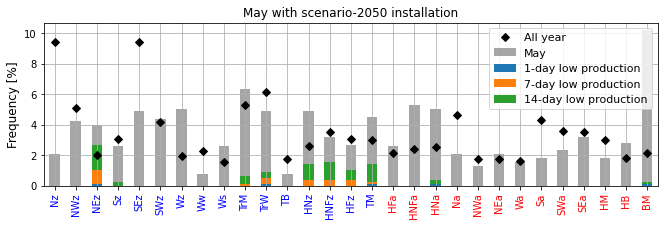

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(11, 3), sharex=True, sharey=True)

# ## There are 775 days of May in 1995--2017
# 5 of 1-day events
# 3 of 7-day events
# 4 of 14-day events

df_count_for_May_and_more.index = pd.Categorical(df_count_for_May_and_more.index, categories=list_lgcGWL)

# df_count_for_May_and_more[['GWL_wholeyear', 'GWL_May']].loc[list_lgcGWL].plot.bar(width=.7, ax=axes, color=['black', 'grey'], alpha=.7)
df_count_for_May_and_more['GWL_wholeyear'].plot(marker='D', linestyle='None', markerfacecolor='black', markeredgecolor='black')
df_count_for_May_and_more['GWL_May'].loc[list_lgcGWL].plot.bar(width=.5, ax=axes, color=['grey'], alpha=.7)
df_count_for_May_and_more[['GWL_1day', 'GWL_7day', 'GWL_14day']].loc[list_lgcGWL].plot.bar(width=.5, ax=axes, stacked=True)

axes.legend(labels=['All year', 'May', '1-day low production', '7-day low production', '14-day low production'], fontsize=11)
# axes.legend(labels=['All days', 'All days in May', '1-day low production', '7-day low production', '14-day low production'], fontsize=11)

axes.set_title('May with scenario-2050 installation', fontsize=12)
axes.set_ylabel('Frequency [%]', fontsize=12)

## Colour cyclonic in blue, anticyclonic in red
colors = ['blue']*16 +  ['red']*13
for xtick, color in zip(axes.get_xticklabels(), colors):
    xtick.set_color(color)
plt.grid()
# fig.savefig('paper2/Paper2_Germany_frequency_byGWL_inMay_1_7_14days_Lowproduction_withAllyear.pdf', dpi=100, transparent=True, bbox_inches = "tight")

## Part 2: Maps and meteograms

In [ ]:
from utils_LH import dict_GWL_color

In [ ]:
dict_low_event_centre_date = {'winter_1': dt.datetime(2013,1,12),
                            'winter_2': dt.datetime(1996,12,12),
                            'winter_3': dt.datetime(2007,12,18),
                            'winter_4': dt.datetime(2008,4,10),
                            'winter_5': dt.datetime(2016,10,25),
                            'winter_6': dt.datetime(2011,1,25),
                            'winter_7': dt.datetime(2015,10,23),
                            'winter_8': dt.datetime(2013,2,22),
                            'winter_9': dt.datetime(2008,12,12),
                            'winter_10': dt.datetime(2004,12,8),
                            'summer_1': dt.datetime(2016,5,30),
                            'summer_2': dt.datetime(2002,4,19),
                            'summer_3': dt.datetime(2010,5,8),
                            'summer_4': dt.datetime(2016,7,28),
                            'summer_5': dt.datetime(2016,6,19),
                            'summer_6': dt.datetime(1996,5,15),
                            'summer_7': dt.datetime(1996,10,12),
                            'summer_8': dt.datetime(2010,8,9),
                            'summer_9': dt.datetime(2007,10,7),
                            'summer_10': dt.datetime(2007,5,31)}
dict_low_event_total_anomaly = {'winter_1': -21.57,
                                'winter_2': -21.00,
                                'winter_3': -20.82,
                                'winter_4': -20.78,
                                'winter_5': -20.43,
                                'winter_6': -19.75,
                                'winter_7': -19.74,
                                'winter_8': -19.70,
                                'winter_9': -18.80,
                                'winter_10': -18.71,
                                'summer_1': -19.69,
                                'summer_2': -19.60,
                                'summer_3': -19.54,
                                'summer_4': -16.91,
                                'summer_5': -16.01,
                                'summer_6': -15.96,
                                'summer_7': -15.75,
                                'summer_8': -15.43,
                                'summer_9': -15.23,
                                'summer_10': -14.27}

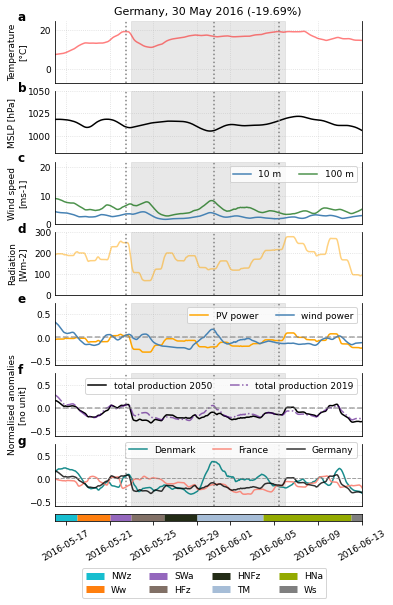

In [ ]:
## OFFICIAL 
# 2023-03-30 -- with GWLs, anomalies compared to typical values
## For main text - with line marked meteorological condition maps

## Meteorological development and anomalies of PV and wind power 
## MASKED for Germany, === SUMMER === event 17--27/12/2007
roll_number = 24
period_sel = [dt.datetime(2016,5,16), dt.datetime(2016,6,13)]
event_sel = [dt.datetime(2016,5,23), dt.datetime(2016,6,6)]

fname = '/net/respos/linhho/energy_model/mask/Timeseries_Germany_mean_rad_t2m_wind10_100m_pmsl_1995_2017.csv'
# fname = '/net/respos/linhho/energy_model/mask/Timeseries_Germany_mean_rad_t2m_wind10_100m_pmsl_2016.csv'
ts_met = pd.read_csv(fname, sep='\t')
ts_met = ts_met.drop('PMSL', axis=1)
ts_met['time'] = pd.to_datetime(ts_met['time'])
ts_met = ts_met.set_index('time')

toplot_met = ts_met.rolling(roll_number, center=True).mean().loc[period_sel[0]:period_sel[1]].copy()
toplot_energy_anomaly = anomaly_all_cnt.loc['DE'].loc['scen2050'][['PV', 'Wp', 'total']].rolling(roll_number, center=True).mean().loc[period_sel[0]:period_sel[1]].copy()
toplot_energy_anomaly2019 = anomaly_all_cnt.loc['DE'].loc['scale2019'][['PV', 'Wp', 'total']].rolling(roll_number, center=True).mean().loc[period_sel[0]:period_sel[1]].copy()

# fig, axes = plt.subplots(constrained_layout=True, nrows=7, sharex=True)
fig = plt.figure(constrained_layout=True, figsize=(5.5,9.2))
widths = [1]
heights = [1,1,1,1,1,1,1,.1]
spec = gridspec.GridSpec(ncols=1, nrows=8, width_ratios=widths, height_ratios=heights, figure=fig, hspace=0.15)

for i in range(8):
    axes[i] = fig.add_subplot(spec[i], sharex=axes[7])

axes[0].plot(toplot_met['t2m']-273.15, color='red', label='t2m', alpha=.5)
# axes[0].legend(loc='upper left')
axes[0].set_ylabel(r'Temperature' "\n" r'[°C]', labelpad=12, fontsize=9)
axes[0].set_ylim(-7,25)

axes[1].plot(toplot_met['pmsl']/100, color='black', label='MSL pressure')
# axes[1].legend(loc='upper right')
axes[1].set_ylabel(r'MSLP [hPa]', labelpad=12, fontsize=9)
axes[1].set_ylim(980,1050)

####

axes[2].plot(toplot_met['wind10'], color='steelblue', label='10 m')
axes[2].plot(toplot_met['wind100m'], color='darkgreen', alpha=.7, label='100 m')
axes[2].legend(ncol=2, prop={'size': 9})
axes[2].set_ylabel(r'Wind speed' "\n" r'[ms-1]', labelpad=12, fontsize=9)
axes[2].set_ylim(0,22)

axes[3].plot(toplot_met['radiation'], color='orange', label='total radiation', alpha=.5)
# axes[3].legend(loc='upper right')
axes[3].set_ylabel(r'Radiation' "\n" r'[Wm-2]', labelpad=10, fontsize=9)
axes[3].set_ylim(0,300)
axes[3].yaxis.set_label_coords(-.09, .5)

####

axes[4].plot(toplot_energy_anomaly['PV'], color='orange', label='PV power')
axes[4].plot(toplot_energy_anomaly['Wp'], color='steelblue', label='wind power')
axes[4].axhline(y=0, linestyle='--', color='grey', alpha=.7)
axes[4].legend(ncol=2, loc='upper right', prop={'size': 9})
axes[4].set_ylim(-.6,.75)

####

axes[5].plot(toplot_energy_anomaly['total'], color='black', label='total production 2050')
axes[5].plot(toplot_energy_anomaly2019['total'], color='indigo', label='total production 2019', linestyle='dashdot', alpha=.6)
axes[5].axhline(y=0, linestyle='--', color='grey', alpha=.7)
axes[5].set_ylabel(r'Normalised anomalies' "\n" r'[no unit]', labelpad=10, fontsize=9)
axes[5].yaxis.set_label_coords(-.09, 0.5)

axes[5].legend(ncol=2, loc='upper right', prop={'size': 9})
# axes[5].set_xticks([])
axes[5].set_ylim(-.6,.75)

for i in range(7):
    axes[i].axvspan(event_sel[0], event_sel[1], alpha=0.5, color='lightgrey')
    axes[i].tick_params(labelbottom=False, length=0)
    
    # no upper border 
    upper_side = axes[i].spines["top"]
    upper_side.set_visible(False)

    ## Mark when map of meteorological conditions
    axes[i].axvline(x='2016-05-22 12:00:00', color='grey', linestyle=':', alpha=3)
    axes[i].axvline(x='2016-05-30 12:00:00', color='grey', linestyle=':', alpha=3)
    axes[i].axvline(x='2016-06-05 12:00:00', color='grey', linestyle=':', alpha=3)

toplot = anomaly_all_cnt.xs(slice(period_sel[0]-dt.timedelta(1), period_sel[1]+dt.timedelta(1)), level='time', drop_level=False)
# axes[6].plot(toplot.loc['AT'].loc['scen2050']['total'].rolling(roll_number, center=True).mean(), alpha=.8, label='Austria')
axes[6].plot(toplot.loc['DK'].loc['scen2050']['total'].rolling(roll_number, center=True).mean(), alpha=.9, label='Denmark', color='teal')
axes[6].plot(toplot.loc['FR'].loc['scen2050']['total'].rolling(roll_number, center=True).mean(), alpha=.9, label='France', color='salmon')
# axes[6].plot(toplot.loc['NO'].loc['scen2050']['total'].rolling(roll_number, center=True).mean(), alpha=.8, label='Norway')
axes[6].plot(toplot.loc['DE'].loc['scen2050']['total'].rolling(roll_number, center=True).mean(), alpha=.8, label='Germany', color='k')
axes[6].axhline(y=0, linestyle='--', color='grey', alpha=.7, linewidth=1)
axes[6].legend(ncol=3, bbox_to_anchor=(1, .9), loc='center right', prop={'size': 9}) 
axes[6].set_ylim(-.6,.75)

### Mark weather patterns
cmap = plt.cm.get_cmap('tab10', 10)
axes[7].plot(toplot_energy_anomaly['total'], alpha=0)
axes[7].set_ylim(-.009,.01)

### Event 2016-05-30  -14.40 % (2016-05-16 --- 06-13) -- 8 GWLs
axes[7].hlines(y=0, xmin='2016-05-16', xmax='2016-05-18', linewidth=7, color=cmap(9), label='NWz')
axes[7].hlines(y=0, xmin='2016-05-18', xmax='2016-05-21', linewidth=7, color=cmap(1), label='Ww')
axes[7].hlines(y=0, xmin='2016-05-21', xmax='2016-05-23', linewidth=7, color=cmap(4), label='SWa')
axes[7].hlines(y=0, xmin='2016-05-23', xmax='2016-05-26', linewidth=7, color=list_20distinct_colour[6], label='HFz')
axes[7].hlines(y=0, xmin='2016-05-26', xmax='2016-05-29', linewidth=7, color=list_20distinct_colour[19], label='HNFz')
axes[7].hlines(y=0, xmin='2016-05-29', xmax='2016-06-04', linewidth=7, color=list_20distinct_colour[3], label='TM')
axes[7].hlines(y=0, xmin='2016-06-04', xmax='2016-06-12', linewidth=7, color=list_20distinct_colour[16], label='HNa')
axes[7].hlines(y=0, xmin='2016-06-12', xmax='2016-06-13', linewidth=7, color=cmap(7), label='Ws')


### anchor .9 for 8 GWLs, .8 for 6 GWLs, 1 for 9 GWLs
axes[7].legend(ncol=4, bbox_to_anchor=(.9, -10), loc='center right', fontsize=9)
axes[7].set_yticks([])

axes[7].set_xlim(period_sel[0], period_sel[1])
axes[0].set_title('Germany, 30 May 2016 (-19.69%)'.format(roll_number), fontsize=11)
axes[7].tick_params(axis='x', rotation=30, labelsize=9)

## numbering subplots
axs = axes[:-1].flat
for n, ax in enumerate(axs):
    ax.text(-.12, 1, string.ascii_lowercase[n], transform=ax.transAxes, size=12, weight='bold')
    ax.grid(which='major', color='#B4B4B4', linestyle=':', alpha=.5)
    ax.tick_params(axis='y', labelsize=9)

plt.subplots_adjust(wspace=None, hspace=None)
# fig.tight_layout()
fig.savefig('paper2/Meteogram/Paper2_Germany_met_progression_v6_summer_May2016_GWL_roll{}_14day_maintext.pdf'.format(roll_number), dpi=100, transparent=True, bbox_inches = "tight")

### with data processing - Maps - meteorological progression

### Typical hour of day of month - map Europe

In [ ]:
## get average for each day in each month
## Time series of the same period 1995--2017, but values are average of all hours having the same month AND day AND hour
## For PV and wind power
no need to run again

from calendar import monthrange

ts_DE_2019_typical_months = pd.DataFrame(columns=['Hour', 'PV_DE', 'Wp_DE', 'total_DE', 'Year', 'Month', 'Day'])
fname = glob.glob("/net/respos/linhho/energy_model/*_PV_wind_generation_v2.nc")    
ds_rem = xr.open_mfdataset(fname)


## one for normal year, e.g. 2007
year = 2007
my_PV =  None
my_Wp = None

for month in range(1, 13):
    print(month)
    for day in range(1, monthrange(year,month)[1]+1):
        for hour in range(24):
            ## set of all indices having the same hour AND day AND month
            take_index = ts_DE_2019[(ts_DE_2019['Month']==month) & (ts_DE_2019['Day']==day) & (ts_DE_2019['Hour']==hour)].index.copy()

            Wp = np.mean(ds_rem['Wp2050'].loc[take_index], axis=0)
            PV = np.mean(ds_rem['PV2050'].loc[take_index], axis=0)
            
        # add up each layer to total wind power generation in each grid cell
            if my_PV is None: my_PV = np.array(PV)[np.newaxis,...]   ; my_Wp = np.array(Wp)[np.newaxis,...] 
            else:
                my_PV = np.vstack([ my_PV, np.array(PV)[np.newaxis,...] ])
                my_Wp = np.vstack([ my_Wp, np.array(Wp)[np.newaxis,...] ])

filename =  '/net/respos/linhho/energy_model/processed/PV_wind_generation_scen2050_typical_{}.nc'.format(year)
time = pd.date_range(dt.datetime(year, 1, 1), dt.datetime(year+1, 1, 1), freq="H", closed="left") #, periods=365 * 24)

ds = xr.Dataset({
                 "Wp2050": (('time', 'lon','lat'), my_Wp),
                 "PV2050": (('time', 'lon','lat'), my_PV),
                 "time": time})
ds['Wp2050'].attrs = {'units': 'MW',
                  'name': 'Power production of wind power in Europe planned -TOTAL- 2013 and 2050 CLIMIX - typical for each hour of day of month for 23 years'}
ds['PV2050'].attrs = {'units': 'MW',
                  'name': 'Power production of PV power in Europe 2050 CLIMIX - typical for each hour of day of month for 23 years'}
ds.attrs['Conventions'] = ''  # 'CF-1.7'
ds.attrs['Title'] = 'Energy model output version 2 (2021-09-07)'
ds.attrs['Author'] = 'Linh Ho, Institute of Geophysics and Meteorology, University of Cologne, Germany'
ds.attrs['History'] = str(dt.datetime.utcnow()) + ' Python2'
ds.attrs['References'] = ''   # add my paper later :)
ds.to_netcdf(filename, 'w')


1


KeyboardInterrupt: 

In [ ]:
## get average for each day in each month
## Time series of the same period 1995--2017, but values are average of all hours having the same month AND day AND hour
## For total cloud cover

no need to run again

fname = glob.glob("/data/etcc/cosmo-rea6/hourly/CLCT.2D/CLCT.2D.??????.nc")    
ds_rem = xr.open_mfdataset(fname)


## one for normal year, e.g. 2007
year = 2007
my_PV =  None
my_Wp = None

for month in range(1, 13):
    print(month)
    for day in range(1, monthrange(year,month)[1]+1):
        for hour in range(24):
            ## set of all indices having the same hour AND day AND month
            take_index = ts_DE_2019[(ts_DE_2019['Month']==month) & (ts_DE_2019['Day']==day) & (ts_DE_2019['Hour']==hour)].index.copy()

            Wp = np.mean(ds_rem['Wp2050'].loc[tmp], axis=0)
            PV = np.mean(ds_rem['PV2050'].loc[tmp], axis=0)
            
        # add up each layer to total wind power generation in each grid cell
            if my_PV is None: my_PV = np.array(PV)[np.newaxis,...]   ; my_Wp = np.array(Wp)[np.newaxis,...] 
            else:
                my_PV = np.vstack([ my_PV, np.array(PV)[np.newaxis,...] ])
                my_Wp = np.vstack([ my_Wp, np.array(Wp)[np.newaxis,...] ])

filename =  '/net/respos/linhho/energy_model/processed/PV_wind_generation_scen2050_typical_{}.nc'.format(year)
time = pd.date_range(dt.datetime(year, 1, 1), dt.datetime(year+1, 1, 1), freq="H", closed="left") #, periods=365 * 24)

ds = xr.Dataset({
                 "Wp2050": (('time', 'lon','lat'), my_Wp),
                 "PV2050": (('time', 'lon','lat'), my_PV),
                 "time": time})
ds['Wp2050'].attrs = {'units': 'MW',
                  'name': 'Power production of wind power in Europe planned -TOTAL- 2013 and 2050 CLIMIX - typical for each hour of day of month for 23 years'}
ds['PV2050'].attrs = {'units': 'MW',
                  'name': 'Power production of PV power in Europe 2050 CLIMIX - typical for each hour of day of month for 23 years'}
ds.attrs['Conventions'] = ''  # 'CF-1.7'
ds.attrs['Title'] = 'Energy model output version 2 (2021-09-07)'
ds.attrs['Author'] = 'Linh Ho, Institute of Geophysics and Meteorology, University of Cologne, Germany'
ds.attrs['History'] = str(dt.datetime.utcnow()) + ' Python2'
ds.attrs['References'] = ''   # add my paper later :)
ds.to_netcdf(filename, 'w')


### Map of anomalies of PV and wind power compared to the typical condition for that month
(2023-03-27)

In [ ]:
# fname = '/net/respos/linhho/energy_model/processed/PV_wind_generation_scen2050_typical_2007.nc'
# ds_typical = xr.open_dataset(fname)/
# fname = '/net/respos/linhho/energy_model/{}_PV_wind_generation_v2.nc'.format(time_slice.year)
# ds_energy = xr.open_dataset(fname)
# ds_energy

<xarray.Dataset>
Dimensions:    (lat: 106, lon: 103, time: 8784)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 ... 2016-12-31T23:00:00
Dimensions without coordinates: lat, lon
Data variables:
    PV2050_CF  (time, lon, lat) float64 ...
    Wp2050     (time, lon, lat) float32 ...
    Wp_CF      (time, lon, lat) float64 ...
    Wp2050_CF  (time, lon, lat) float64 ...
    Wp         (time, lon, lat) float32 ...
    PV2050     (time, lon, lat) float64 ...
Attributes:
    Conventions:  
    Title:        Energy model output version 2 (2021-09-07)
    Author:       Linh Ho, Institute of Geophysics and Meteorology, Universit...
    History:      2021-11-23 13:50:38.090396 Python2
    References:   
    Notes:        Wind speed at hubheight interpolated from wind at level 36 ...

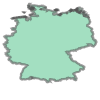

In [ ]:
import geopandas as gpd

cnt = 'germany'

fname = '/home/linhho/Documents/Code_PhD/mask_country_rea6/mask_{}.pckl'.format(cnt)
obj = pd.read_pickle(fname)
mask_cnt = np.logical_not(obj[::8,::8])

polys=gpd.read_file("/home/linhho/Documents/Code_PhD/CNTR_RG_01M_2020_4326/CNTR_RG_01M_2020_4326.shp")
cntrs=polys["geometry"]
cntrs.index=polys.FID
cntrs['DE']


In [ ]:
## Mean value of radiation and wind speed in Germany for 14-day events Dec 2007 and May 2016


# time_slice_all = pd.date_range(dt.datetime(2007,12,11, 12,0,0), dt.datetime(2007,12,25,12,0,0), freq="1D", closed="left")
time_slice_all = pd.date_range(dt.datetime(2016,5,23, 12,0,0), dt.datetime(2016,6,6,12,0,0), freq="1D", closed="left")

fname = '/data/etcc/cosmo-rea6/hourly/48km/{}_COSMO-REA6_hourly_48km.nc'.format(time_slice_all[0].year)
ds_met_event = xr.open_dataset(fname).sel(time = time_slice_all)

event_rad_de = np.ma.array(ds_met_event['total_radiation'], mask=np.tile(mask_cnt, (len(ds_met_event.time),1,1)))
event_wsp_de = np.ma.array(ds_met_event['wsp'], mask=np.tile(mask_cnt, (len(ds_met_event.time),1,1)))

print('Mean value in 14-day event for Germany: radiation {:.2f}, wind 10m {:.2f}'.format(np.nanmean(event_rad_de), np.nanmean(event_wsp_de)))
print('Mean value in 14-day event for the whole domain: radiation {:.2f}, wind 10m {:.2f}'.format(np.nanmean(ds_met_event['total_radiation']), np.nanmean(ds_met_event['wsp'])))


Mean value in 14-day event for Germany: radiation 371.46, wind 10m 3.03
Mean value in 14-day event for the whole domain: radiation 582.68, wind 10m 4.96


### Plot direct and diffuse radiation for revision

In [ ]:
fname = '/data/etcc/cosmo-rea6/hourly/SWDIRS_RAD.2D.199507.nc'
ds_dir = xr.open_dataset(fname)['SWDIRS_RAD'][:24]
ts_dir = np.ma.array(ds_dir, mask=np.tile(obj, (len(ds_dir.time),1,1)))
fname = '/data/etcc/cosmo-rea6/hourly/SWDIFDS_RAD.2D.199507.nc'
ds_dif = xr.open_dataset(fname)['SWDIFDS_RAD'][:24]
ts_dif = np.ma.array(ds_dif, mask=np.tile(obj, (len(ds_dif.time),1,1)))

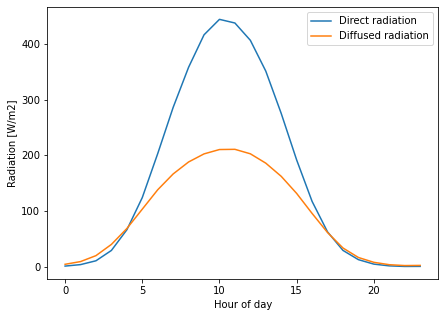

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.plot(np.nanmean(ts_dir, axis=(1,2)), label='Direct radiation')
ax.plot(np.nanmean(ts_dif, axis=(1,2)), label='Diffused radiation')
ax.set_ylabel('Radiation [W/m2]')
ax.set_xlabel('Hour of day')
plt.legend()
fig.savefig('revision_radiation_direct_diffused', dpi=200, transparent=True, bbox_inches = "tight")

#### Big plot 4 maps with German mean values of cloud cover, etc.

In [ ]:
## From REM POTENTIAL, mask country === time series of cloud cover mean for Germany 1995--2017
country_name = 'germany'
fname = '/home/linhho/Documents/Code_PhD/mask_country_rea6/mask_{}.pckl'.format(country_name)
obj = pd.read_pickle(fname)
mask_cnt_rea6 = np.logical_not(obj[::8,::8])

ts_cloud_de = pd.DataFrame()

    ## Mean cloud cover in Germany
for year in range(1995,2018):
    print(year, sep=', ')
    ds_cloud = xr.open_dataset('/data/etcc/cosmo-rea6/hourly/CLCT.2D/CLCT.2D.{}12.nc'.format(year))
    time_slice_all = ds_cloud['time']
    mean_cloud_cover = []
    
    for time_slice in time_slice_all:
        tmp = np.nanmean(np.ma.array(ds_cloud.sel(time=time_slice)['tcc'].load(), mask=obj))
        mean_cloud_cover.append(tmp)

    tmp_df = pd.DataFrame({'time':time_slice_all, 'cloud_cover_DE':mean_cloud_cover})
    ts_cloud_de = pd.concat([ts_cloud_de, tmp_df])
ts_cloud_de

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008


ValueError: different number of dimensions on data and dims: 1 vs 0

In [ ]:
ts_cloud_de['Season'] = np.repeat(df_GWL_season[df_GWL_season['Year']<=2007]['Season'], 24).to_list()
print('Mean cloud cover hourly Germany 1995--2007 annual {:.2f}%, winter {:.2f}%, summer {:.2f}%'.format(ts_cloud_de['cloud_cover_DE'].mean(),
              ts_cloud_de[ts_cloud_de['Season']=='winter']['cloud_cover_DE'].mean(), 
              ts_cloud_de[ts_cloud_de['Season']=='summer']['cloud_cover_DE'].mean()))

Mean cloud cover hourly Germany 1995--2007 annual 59.62%, winter 64.68%, summer 54.59%


In [ ]:
## NEW with GH iradiance - 2023-07-10
## 4 subplots of maps of: wind surface, irradiance, anomalies of PV and wind power production
## 4 panels
### Anomaly : (time_sel - that_time_typical) / (max - min of that grid cell)
import os
import warnings
warnings.filterwarnings('ignore')

list_20_events_start = ['2013-01-05', '1996-12-05', '2007-12-11', '2008-04-03', '2016-10-18', '2011-01-18', '2015-10-16', '2013-02-15', '2008-12-05', '2004-12-01',
                       '2016-05-23', '2002-04-12', '2010-05-01', '2016-07-21', '2016-06-12', '1996-05-08', '1996-10-05', '2010-08-02', '2007-09-30', '2007-05-24']
list_20_events_start = pd.to_datetime(list_20_events_start)

for time_start in list_20_events_start:
    print(time_start)
    time_start = dt.datetime(time_start.year, time_start.month, time_start.day, 12,0,0)  ## mid-day for radiation
    time_slice_all = pd.date_range(time_start - dt.timedelta(days=7), time_start + dt.timedelta(days=20), freq="1D", closed="left")
    label = time_slice_all[14].strftime('%b%Y')  ## eg. Dec2007
    dir_progression = '/net/respos/linhho/PLOTtest/Paper2_metprogression/to_mp4_{}/'.format(label) 
    if not os.path.exists(dir_progression):    os.makedirs(dir_progression)

    ## 2016-07-12 --- 08-11
    ## 2007-12-3 ---- 2008-01-1
    # time_slice_all = pd.date_range(dt.datetime(2012,12,29, 12,0,0), dt.datetime(2013,1,25,12,0,0), freq="1D", closed="left")

    # time_slice_all = pd.date_range(dt.datetime(2007,12,4, 12,0,0), dt.datetime(2007,12,31,12,0,0), freq="1D", closed="left")
    # time_slice_all = pd.date_range(dt.datetime(2016,5,16, 12,0,0), dt.datetime(2016,6,12,12,0,0), freq="1D", closed="left")
    # time_slice_all = [dt.datetime(2007,12,6, 12,0,0), dt.datetime(2007,12,17,12,0,0), dt.datetime(2007,12,27,12,0,0)]

    clevs = np.arange(960,1050,5)
    pressure_color = 'black'
    col_bar_shrink = .6

    fname = '/net/respos/linhho/energy_model/processed/PV_wind_generation_scen2050_typical_2007.nc'
    ds_typical = xr.open_dataset(fname)

    for time_slice in time_slice_all:

        fig, axs = plt.subplots(nrows=1, ncols=4, subplot_kw={'projection': rotated_projection_cosmo}, figsize=(15,4))
        fig.subplots_adjust(wspace=0.05, hspace=0.02)    
    #     fig.subplots_adjust(left=0.02, bottom=0.02, right=1, top=0.5, wspace=0.05, hspace=0.05)    

        #     my_title = GWL + ' \n ' + GWL_table.definition.loc[GWL]

        ##########   Meteo  #############################
        ## read meteorological data (48 km hourly version)
        # fname = ['/data/etcc/cosmo-rea6/hourly/48km/2016_COSMO-REA6_hourly_48km.nc', '/data/etcc/cosmo-rea6/hourly/48km/2008_COSMO-REA6_hourly_48km.nc']
        fname = '/data/etcc/cosmo-rea6/hourly/48km/{}_COSMO-REA6_hourly_48km.nc'.format(time_slice.year)
        ds_met = xr.open_dataset(fname)

        toplot1 = ds_met['wsp'].sel(time=time_slice).load()
        toplot2 = ds_met['total_radiation'].sel(time=time_slice).load()
        toplot2 = toplot2.where(toplot2>0)  ## filter out zero values
        toplot_contour = ds_met['pmsl'].sel(time=time_slice).load()/100

        ##########   Energy  #############################
        fname = '/net/respos/linhho/energy_model/{}_PV_wind_generation_v2.nc'.format(time_slice.year)
        ds_energy = xr.open_dataset(fname)

        time_slice_typical = dt.datetime(2007, time_slice.month, time_slice.day, 12,0,0)
        toplot3 = ( ds_energy['Wp2050'].sel(time=time_slice) - ds_typical['Wp2050'].sel(time=time_slice_typical) ) / (np.amax(ds_typical['Wp2050'], axis=0) - np.amin(ds_typical['Wp2050'], axis=0)) *100
        toplot4 = ( ds_energy['PV2050'].sel(time=time_slice) - ds_typical['PV2050'].sel(time=time_slice_typical) ) / (np.amax(ds_typical['PV2050'], axis=0) - np.amin(ds_typical['PV2050'], axis=0)) *100

        #########################################
        #   Global horizontal irradiance / total radiation??
        #########################################

        my_cmap = plt.get_cmap('YlOrBr', 10)
        colorbar_range = [0, 1000]

        mesh = axs[0].pcolormesh(new_lon, new_lat, toplot2,
                     transform=ccrs.PlateCarree(), cmap=my_cmap, zorder=0, vmin=colorbar_range[0], vmax=colorbar_range[1])
        axs[0].coastlines(alpha=1, linewidth=.7)
        axs[0].add_feature(cartopy.feature.BORDERS, alpha = 1, linestyle=':')
        axs[0].set_extent(cosmo_map_extent, crs=rotated_projection_cosmo)  # boundary of the map

        ds_cloud = xr.open_dataset('/data/etcc/cosmo-rea6/hourly/CLCT.2D/CLCT.2D.{}12.nc'.format(time_slice.year)).sel(time=time_slice)['tcc'].load()
        mean_cloud_cover = np.nanmean(np.ma.array(ds_cloud, mask=obj))
        axs[0].set_title('Cloud cover {:.1f}%'.format(mean_cloud_cover))

        #### Colourbar 
        cbar01 = plt.colorbar(mesh, ax=axs[0], orientation='vertical', shrink = col_bar_shrink, pad=0.05, extend="max")
        cbar01.ax.set_title('$[W/m^2]$', fontsize=12, position=(2.5, -2))

        #########################################
        #   PV power
        #########################################
        colorbar_range = [-60, 60]  # [-PV_range, PV_range]
        my_cmap = plt.get_cmap('PiYG',20)

        mesh = axs[1].pcolormesh(new_lon, new_lat, toplot4,
                     transform=ccrs.PlateCarree(), cmap=my_cmap, zorder=0, vmin=colorbar_range[0], vmax=colorbar_range[1])
        axs[1].coastlines(alpha=.8, linewidth=.6)
        axs[1].add_feature(cartopy.feature.BORDERS, alpha = 0.6, linestyle=':')
        axs[1].set_extent(cosmo_map_extent, crs=rotated_projection_cosmo)  # boundary of the map
        axs[1].add_geometries(cntrs['DE'], ccrs.PlateCarree(), edgecolor='blue', linewidth=1, facecolor='none')
        mean_pv_power_anomaly = np.nanmean(np.ma.array(toplot4, mask=mask_cnt))
        axs[1].set_title('PV power anomaly {:.1f}%'.format(mean_pv_power_anomaly))

        #### Colourbar 
        cbar03 = plt.colorbar(mesh, ax=axs[1], orientation='vertical', shrink = col_bar_shrink, pad=0.05, extend="both")
        cbar03.ax.set_title('[%]', fontsize=12)



        #########################################
        #   wind speed 10 m
        #########################################

        my_cmap = plt.get_cmap('Greens', 10)
        colorbar_range = [0, 25]

        mesh = axs[2].pcolormesh(new_lon, new_lat, toplot1,
                     transform=ccrs.PlateCarree(), cmap=my_cmap, zorder=0, vmin=colorbar_range[0], vmax=colorbar_range[1])
        axs[2].coastlines(alpha=.7, linewidth=.6)
        axs[2].add_feature(cartopy.feature.BORDERS, alpha = 0.5, linestyle=':')
        axs[2].set_extent(cosmo_map_extent, crs=rotated_projection_cosmo)  # boundary of the map

        cs = axs[2].contour(new_lon, new_lat, toplot_contour, clevs, linewidths=1.2, colors=pressure_color,
                     transform=ccrs.PlateCarree())
        axs[2].clabel(cs, inline=1, fmt='%.0f', fontsize=14)  #, colors='green')
        ## write the corresponding GWL
        mean_wind_DE_10m = np.nanmean(np.ma.array(toplot1, mask=mask_cnt))
        axs[2].set_title('10-m wind speed {:.1f} m/s'.format(mean_wind_DE_10m))

        #### Colourbar 
        cbar00 = plt.colorbar(mesh, ax=axs[2], orientation='vertical', shrink = col_bar_shrink, pad=0.05, extend="max")
        cbar00.ax.set_title('$[m/s]$', fontsize=12, position=(1.5, -2))

        #########################################
        #   Wind power
        #########################################
        colorbar_range = [-60, 60]  # [-PV_range, PV_range]
        my_cmap = plt.get_cmap('PiYG',20)

        mesh = axs[3].pcolormesh(new_lon, new_lat, toplot3,
                     transform=ccrs.PlateCarree(), cmap=my_cmap, zorder=0, vmin=colorbar_range[0], vmax=colorbar_range[1])
        axs[3].coastlines(alpha=.7, linewidth=.6)
        axs[3].add_feature(cartopy.feature.BORDERS, alpha = 0.5, linestyle=':')
        axs[3].set_extent(cosmo_map_extent, crs=rotated_projection_cosmo)  # boundary of the map
        axs[3].add_geometries(cntrs['DE'], ccrs.PlateCarree(), edgecolor='blue', linewidth=1, facecolor='none')
        mean_wind_power_anomaly = np.nanmean(np.ma.array(toplot3, mask=mask_cnt))
        axs[3].set_title('Wind power anomaly {:.1f}%'.format(mean_wind_power_anomaly))

        #### Colourbar 
        cbar02 = plt.colorbar(mesh, ax=axs[3], orientation='vertical', shrink = col_bar_shrink, pad=0.05, extend="both")
        cbar02.ax.set_title('[%]', fontsize=12)


    #     cbar00.set_label('Wind speed 10m [m/s]', fontsize=12)

        get_gwl = df_GWL_season.set_index('Date').loc[dt.datetime(time_slice.year, time_slice.month, time_slice.day)]['lgcGWL']
        fig.suptitle(str(time_slice) + '   ' + str(get_gwl) + '   ' +  '{:.2f}%'.format(anomaly_all_cnt.loc['DE'].loc['scen2050'].loc[time_slice]['total']*100), fontsize=13, y=.95)
        plotname = dir_progression + 'Paper2_metprogress_{}_{}.jpg'.format(label, time_slice.strftime('%Y%m%d'))
        fig.savefig(plotname, dpi=150, transparent=True, bbox_inches = "tight")


NameError: name 'pd' is not defined